In [1]:
import pandas as pd
import numpy as np
import re
import random
random.seed(42)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/mohler_dataset_edited.csv")
df['index'] = [x for x in range(df.shape[0])]
df

,id,question,desired_answer,student_answer,score_me,score_other,score_avg,index
0,1.10,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,4.0,3.00,3.500,0
1,1.10,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the desired final prod...,5.0,5.00,5.000,1
2,1.10,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,5.0,3.00,4.000,2
3,1.10,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0,5.00,5.000,3
4,1.10,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0,3.00,3.000,4
...,...,...,...,...,...,...,...,...
2268,12.11,How many steps does it take to search a node i...,The height of the tree.,log n,4.5,5.00,4.750,2268
2269,12.11,How many steps does it take to search a node i...,The height of the tree.,( n(n-1) ) / 2,0.0,3.00,1.500,2269
2270,12.11,How many steps does it take to search a node i...,The height of the tree.,2n-1,0.0,4.75,2.375,2270
2271,12.11,How many steps does it take to search a node i...,The height of the tree.,"it takes at most h steps, where h is the heigh...",5.0,5.00,5.000,2271


In [3]:
df['id'].value_counts()

3.7     31
3.6     31
3.5     31
3.4     31
3.3     31
        ..
10.5    24
10.4    24
10.3    24
10.2    24
10.1    24
Name: id, Length: 81, dtype: int64

In [4]:
non_natives_ids = random.choices(df['index'], k =round(df.shape[0]*0.1)) # 10% non natives
non_natives_ids
df["is_foreign"] = df['index'].isin(non_natives_ids).astype(int)
df["is_foreign"].value_counts()

0    2059
1     214
Name: is_foreign, dtype: int64

In [5]:
for val in df['id'].unique():
    idx = df.index[df['id'] == val]
    chosen_idx = np.random.choice(idx, size=min(4, len(idx)), replace=False)
    df.loc[chosen_idx, 'is_foreign'] = 1

In [6]:
df['is_foreign'].fillna(0, inplace=True)
df['is_foreign'].value_counts()


0    1767
1     506
Name: is_foreign, dtype: int64

In [7]:
df['is_foreign'] = df['is_foreign'].astype(int)

In [8]:
df['is_foreign'].value_counts()

0    1767
1     506
Name: is_foreign, dtype: int64

In [13]:
# df.query('is_foreign == 1')["student_answer"].apply(lambda x :re.sub(r"tion", "shen", x))
def make_text_worse(x):
  if random.random() < 0.4:
    x = re.sub(r"tion", "shen", x)
  if random.random() < 0.6:
    x = re.sub(r"ss", "s", x)
  if random.random() < 0.3:
    x = re.sub(r"dd", "d", x)
  if random.random() < 0.5:
    x = re.sub(r"in", "en", x)
    x = re.sub(r"le", "l", x)
  if random.random() < 0.6:
    x = re.sub(r"y", "i", x)
  if random.random() < 0.3:
    x = re.sub(r"th", "z", x)
  if random.random() < 0.6:
    x = re.sub(r"ts", "t", x)
  if random.random() < 0.4:
    x = re.sub(r"re", "ri", x)
  if random.random() < 0.3:
    x = re.sub(r"eigh", "ei", x)
  if random.random() < 0.1:
    x = re.sub(r"is", "", x)
  if random.random() < 0.3:
    x = re.sub(r"es", "s", x)
  if random.random() < 0.4:
    x = re.sub(r"is the", "the is", x)
  if random.random() < 0.4:
    x = re.sub(r"is an", "", x)
  if random.random() < 0.6:
    x = re.sub(r"It is", "Is it", x)
  if random.random() < 0.6:
    x = re.sub(r"it is", "is it", x)
  return x


foreigners = df["is_foreign"] == 1
natives = df["is_foreign"] == 0

df.loc[foreigners, 'student_answer'] = df.loc[foreigners, 'student_answer'].apply(lambda x : make_text_worse(x))

df.query('is_foreign == 1')["student_answer"]


1       To simulate porshens of the dsirid fenal produ...
5       To find problem and errors in a program befori...
14      A prototipe program provids a basic groundwork...
20      it simulat ze behavior of portions of ze dsire...
25      The rol of a prototipe program  to help spot k...
                              ...                        
2261                                               log(n)
2262    worst case scenario = the number of lvels of t...
2264    log(n)    where n equals the total number of n...
2267    three steps visit the root node, then go to ri...
2271    it takes at most h steps, wheri h is ze heit o...
Name: student_answer, Length: 506, dtype: object

In [10]:
df["math_grade"] = [0]*df.shape[0]

df['math_grade'][df.is_foreign == 1] = df['id'][df.is_foreign == 1].apply(lambda x: round(min(np.random.normal(90, 5), 100)))
df['math_grade'][df.is_foreign == 0] = df['id'][df.is_foreign == 0].apply(lambda x: round(min(np.random.normal(80, 10), 100)))

df

<ipython-input-10-41dda419b215>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['math_grade'][df.is_foreign == 1] = df['id'][df.is_foreign == 1].apply(lambda x: round(min(np.random.normal(90, 5), 100)))
<ipython-input-10-41dda419b215>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['math_grade'][df.is_foreign == 0] = df['id'][df.is_foreign == 0].apply(lambda x: round(min(np.random.normal(80, 10), 100)))


,id,question,desired_answer,student_answer,score_me,score_other,score_avg,index,is_foreign,math_grade
0,1.10,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,4.0,3.00,3.500,0,0,88
1,1.10,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the dsirid fenal produ...,5.0,5.00,5.000,1,1,88
2,1.10,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,5.0,3.00,4.000,2,0,82
3,1.10,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0,5.00,5.000,3,0,71
4,1.10,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0,3.00,3.000,4,0,80
...,...,...,...,...,...,...,...,...,...,...
2268,12.11,How many steps does it take to search a node i...,The height of the tree.,log n,4.5,5.00,4.750,2268,0,81
2269,12.11,How many steps does it take to search a node i...,The height of the tree.,( n(n-1) ) / 2,0.0,3.00,1.500,2269,0,66
2270,12.11,How many steps does it take to search a node i...,The height of the tree.,2n-1,0.0,4.75,2.375,2270,0,80
2271,12.11,How many steps does it take to search a node i...,The height of the tree.,"it takes at most h steps, wheri h is the heigh...",5.0,5.00,5.000,2271,1,93


In [11]:
df.loc[foreigners, 'math_grade'].mean()

90.03952569169961

In [35]:
df.loc[natives, 'math_grade'].mean()

79.98614674191893

In [14]:
df.to_csv("db_with_inserted_textual_mistakes_2.csv")

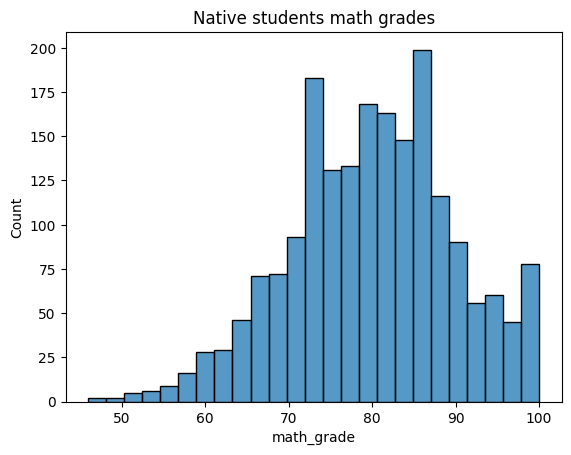

In [37]:
sns.histplot(df.loc[natives, 'math_grade'])
plt.title("Native students math grades")
plt.show()

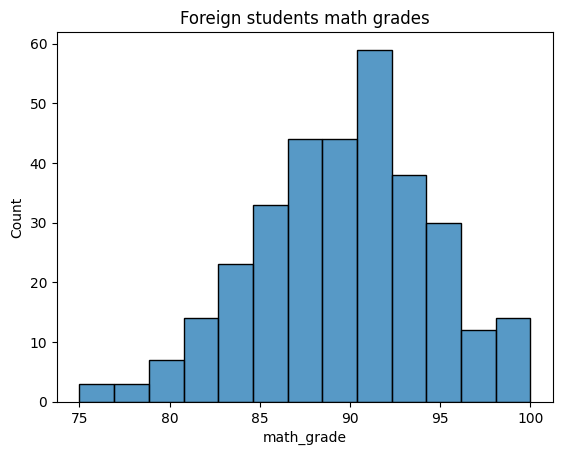

In [38]:
sns.histplot(df.loc[foreigners, 'math_grade'])
plt.title("Foreign students math grades")
plt.show()

In [ ]:
# f_dic = {}
# for f in non_natives_ids:
#   f_dic[f] = round(min(np.random.normal(90, 10), 100))

# n_dic = {}
# for n in df.where(natives)['id'].unique():
#   n_dic[n] = round(min(np.random.normal(80, 10), 100))